In [2]:
import pandas as pd

data = {'A': [1, 2, 2, 4], 'B': ['x', 'y', 'y', 'z'], 'C': [1, 2, 2, 4]}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Detect duplicate rows
duplicates = df.duplicated()
print("\nDuplicate rows:")
print(duplicates)

# Remove duplicate rows
# You can use the drop_duplicates() method to remove duplicate rows from a DataFrame.
df_no_duplicates = df.drop_duplicates()
print("\nDataFrame after removing duplicate rows:")
print(df_no_duplicates)

# Detecting Duplicate Columns
# To find duplicate columns, you can transpose the DataFrame and then use the duplicated() method. 
# The transpose (.T) switches rows and columns, allowing you to check for duplicated columns as if they were rows.

# Detect duplicate columns
duplicate_columns = df.T.duplicated()
print("\nDuplicate columns:")
print(duplicate_columns)

# Remove duplicate columns
df_no_duplicate_columns = df.T.drop_duplicates()
print("\nDataFrame after removing duplicate columns:")
print(df_no_duplicate_columns)


Original DataFrame:
   A  B  C
0  1  x  1
1  2  y  2
2  2  y  2
3  4  z  4

Duplicate rows:
0    False
1    False
2     True
3    False
dtype: bool

DataFrame after removing duplicate rows:
   A  B  C
0  1  x  1
1  2  y  2
3  4  z  4

Duplicate columns:
A    False
B    False
C     True
dtype: bool

DataFrame after removing duplicate columns:
   0  1  2  3
A  1  2  2  4
B  x  y  y  z


In [1]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({
    'Name': ['John', 'John', 'Mary', 'Peter', 'John'],
    'Age': [25, 25, 30, 35, 25],
    'City': ['New York', 'Chicago', 'Los Angeles', 'Houston', 'Chicago']
})

# remove duplicate rows based on all columns
df.drop_duplicates(inplace=True)

# print dataframe after removing duplicate rows
print(df)

    Name  Age         City
0   John   25     New York
1   John   25      Chicago
2   Mary   30  Los Angeles
3  Peter   35      Houston


In [3]:
import numpy as np
import pandas as pd

# Example data
data = {'values': [1, 10, 100, 1000, 10000]}
df = pd.DataFrame(data)

# Applying log transformation
df['log_values'] = np.log(df['values'])

print(df)


   values  log_values
0       1    0.000000
1      10    2.302585
2     100    4.605170
3    1000    6.907755
4   10000    9.210340


Optimal lambda for Box-Cox transformation: 0.7220
   values  boxcox_values
0       1       0.000000
1       2       0.899527
2       3       1.676492
3       4       2.383230
4       5       3.041952


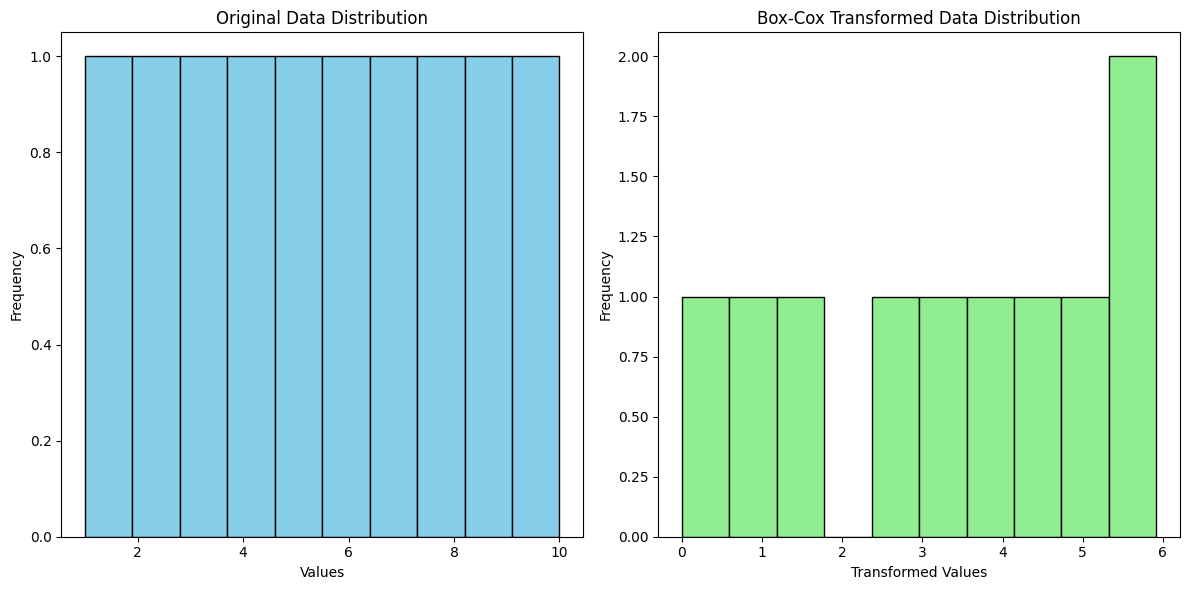

In [21]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import scipy
# Generate some example data
data = {
    'values': np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10
                    ])
}

# Create a DataFrame
df = pd.DataFrame(data)

# Applying the Box-Cox transformation
# The stats.boxcox function automatically finds the best lambda for the transformation
transformed_data, optimal_lambda = scipy.stats.boxcox(df['values'])

# Adding the transformed data to the DataFrame
df['boxcox_values'] = transformed_data

# Output the optimal lambda value and the first few rows of the DataFrame to verify
print(f"Optimal lambda for Box-Cox transformation: {optimal_lambda:.4f}")
print(df.head())

# Visualization: Compare the original and transformed distributions
plt.figure(figsize=(12, 6))

# Original Data Distribution
plt.subplot(1, 2, 1)
plt.hist(df['values'], bins=10, color='skyblue', edgecolor='black')
plt.title('Original Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Transformed Data Distribution
plt.subplot(1, 2, 2)
plt.hist(df['boxcox_values'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Box-Cox Transformed Data Distribution')
plt.xlabel('Transformed Values')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

Optimal lambda value: 0.7219640728650736
   values  boxcox_values
0       1       0.000000
1       2       0.899527
2       3       1.676492
3       4       2.383230
4       5       3.041952
5       6       3.664777
6       7       4.259251
7       8       4.830488
8       9       5.382155
9      10       5.917001


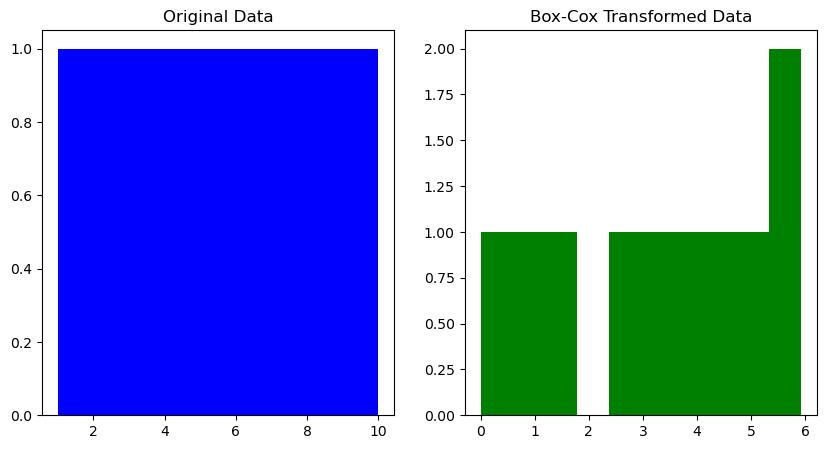

In [8]:
#Box cox transformation

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Example data
data = {'values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Dataset is stored in Pandas dataframe
df = pd.DataFrame(data)

# Apply Box-Cox transformation using stats.boxcox 
#Transformed data is then added to the dataframe in a new column names boxcox_values
df['boxcox_values'], lambda_value = stats.boxcox(df['values'])

print("Optimal lambda value:", lambda_value)
print(df)

# Plotting original vs transformed data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df['values'], bins=10, color='blue')
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.hist(df['boxcox_values'], bins=10, color='green')
plt.title('Box-Cox Transformed Data')

plt.show()


In [24]:
#Z-score normalization
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset (assuming it is available in seaborn)
import seaborn as sns
titanic = sns.load_dataset('titanic')

# Drop missing values for simplicity
titanic.dropna(subset=['age'], inplace=True)

# Z-score normalization of the 'age' column
# scaler = StandardScaler()
titanic['age_zscore'] = StandardScaler().fit_transform(titanic[['age']])

# Display the first few rows
print(titanic[['age', 'age_zscore']].head())


    age  age_zscore
0  22.0   -0.530377
1  38.0    0.571831
2  26.0   -0.254825
3  35.0    0.365167
4  35.0    0.365167


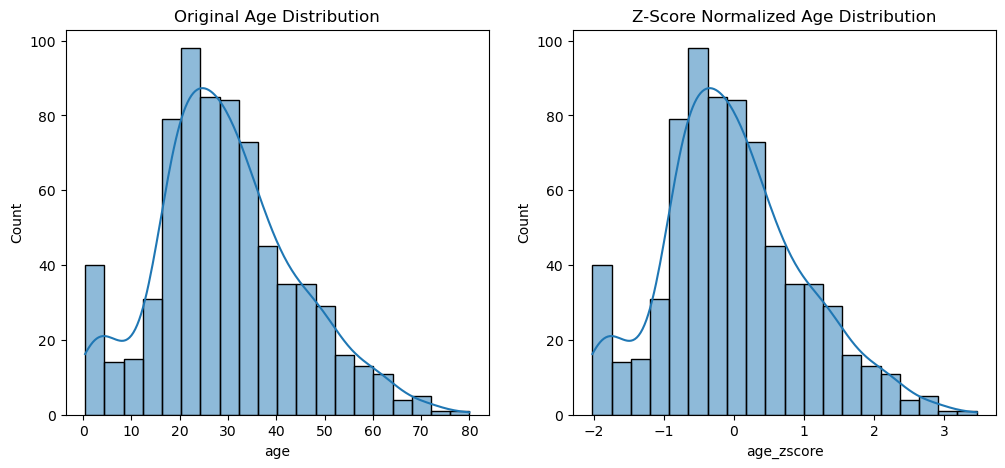

In [15]:
# visualizing the distribution of the original ages and the Z-scores 
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'age' and 'age_zscore' columns exist in the DataFrame 'titanic'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(titanic['age'], kde=True)
plt.title('Original Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(titanic['age_zscore'], kde=True)
plt.title('Z-Score Normalized Age Distribution')

plt.show()

#In the second plot (age_zscore), you should see a distribution centered around 0 with a standard deviation of 1, confirming that the data has been standardized.


In [27]:
# decimal scaling normalization
import pandas as pd
import numpy as np

# Load the Iris dataset (assuming it is available in seaborn)
iris = sns.load_dataset('iris', cache=True)

# Find the maximum absolute value in the sepal_length column
max_val = np.max(np.abs(iris['sepal_length']))
print(max_val.dtype, max_val)
# Calculate j (the smallest integer such that max(|x'|) < 1)
j = np.ceil(np.log10(max_val))

# Apply decimal scaling normalization
iris['sepal_length_scaled'] = iris['sepal_length'] / (10**j)

# Display the first few rows
print(iris[['sepal_length', 'sepal_length_scaled']].head())


float64 7.9
   sepal_length  sepal_length_scaled
0           5.1                 0.51
1           4.9                 0.49
2           4.7                 0.47
3           4.6                 0.46
4           5.0                 0.50


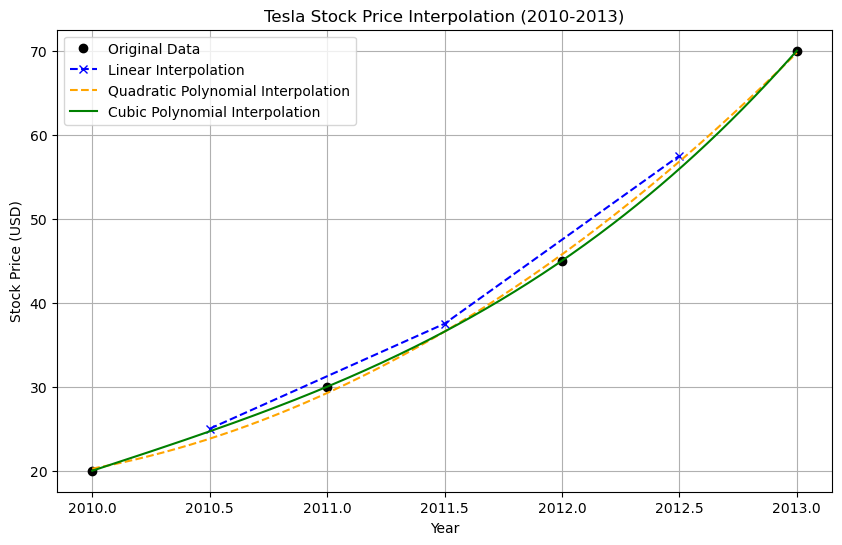

Linear Interpolation - Estimated price for 2010.5: $25.00
Quadratic Interpolation - Estimated price for 2010.5: $23.81
Cubic Interpolation - Estimated price for 2010.5: $24.69
Linear Interpolation - Estimated price for 2011.5: $37.50
Quadratic Interpolation - Estimated price for 2011.5: $36.56
Cubic Interpolation - Estimated price for 2011.5: $36.56
Linear Interpolation - Estimated price for 2012.5: $57.50
Quadratic Interpolation - Estimated price for 2012.5: $56.81
Cubic Interpolation - Estimated price for 2012.5: $55.94


In [14]:
# Linear and Polynomial Interpolation

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from numpy.polynomial import Polynomial

# Hypothetical stock prices for Tesla (2010-2013)
years = np.array([2010, 2011, 2012, 2013])
prices = np.array([20, 30, 45, 70])

# Points where we want to interpolate (e.g., mid-year points)
interpolation_points = np.array([2010.5, 2011.5, 2012.5])

# Linear Interpolation
linear_interp = interp1d(years, prices, kind='linear')

# Polynomial Interpolation using Polynomial fitting
# Fitting a 2nd degree (quadratic) polynomial
quadratic_poly = Polynomial.fit(years, prices, 2)



# Fitting a 3rd degree (cubic) polynomial
cubic_poly = Polynomial.fit(years, prices, 3)

# Generate values for the interpolated points
linear_prices = linear_interp(interpolation_points)
quadratic_prices = quadratic_poly(interpolation_points)
cubic_prices = cubic_poly(interpolation_points)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot original data points
plt.plot(years, prices, 'o', label='Original Data', color='black')

# Plot linear interpolation
plt.plot(interpolation_points, linear_prices, 'x--', label='Linear Interpolation', color='blue')

# Plot quadratic polynomial interpolation
x_new = np.linspace(2010, 2013, 300)
plt.plot(x_new, quadratic_poly(x_new), '--', label='Quadratic Polynomial Interpolation', color='orange')

# Plot cubic polynomial interpolation
plt.plot(x_new, cubic_poly(x_new), '-', label='Cubic Polynomial Interpolation', color='green')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.title('Tesla Stock Price Interpolation (2010-2013)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Output the interpolated values
for i, year in enumerate(interpolation_points):
    print(f"Linear Interpolation - Estimated price for {year}: ${linear_prices[i]:.2f}")
    print(f"Quadratic Interpolation - Estimated price for {year}: ${quadratic_prices[i]:.2f}")
    print(f"Cubic Interpolation - Estimated price for {year}: ${cubic_prices[i]:.2f}")
